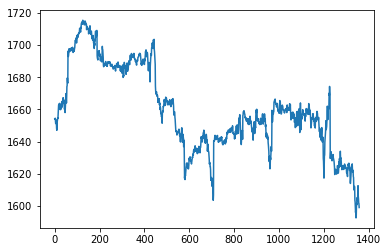

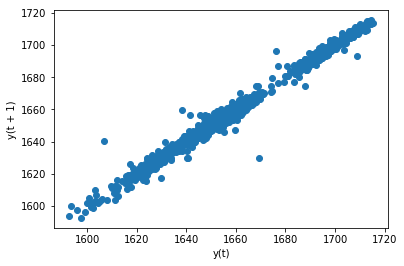

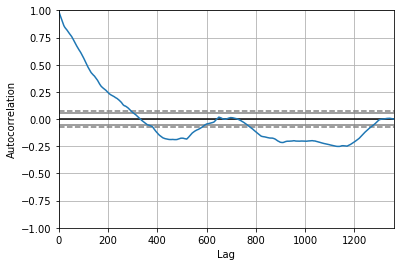

In [17]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot

import statsmodels


df_amzn = pandas.read_excel('amzn.xlsx')

close_amzn = df_amzn['Close']


plt.plot(close_amzn)
plt.show()

lag_plot(close_amzn)
plt.show()

autocorrelation_plot(close_amzn)
plt.show()


In [2]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = close_amzn
train, test = X[1:len(X)-200], X[len(X)-200:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

NameError: name 'close_amzn' is not defined

1650.290361263788

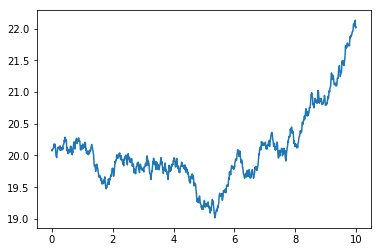

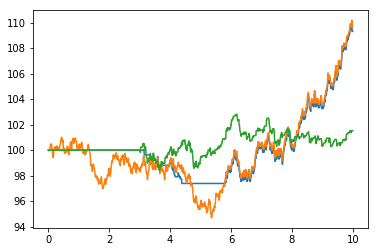

In [4]:
#SCENARIO 1

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

T = 10
mu = 0.01
sigma = 0.02
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash

    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash

#TRADING: AR 
    
time_window = 3*int(1/dt)
cumsum = [0]

ar_prediction = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ar_prediction[i] = x
    if i>=time_window:
        X = S[0:i]
        train = X
        # train autoregression
        model = AR(train)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train), dynamic=False)
        ar_prediction[i] = predictions[0]
    
    if ar_prediction[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ar_prediction[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ar_prediction[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

ar_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
#plt.plot(t, mr_strategy)
plt.plot(t, ar_strategy)
plt.show()

In [69]:
predictions[0]

20.408545825352203

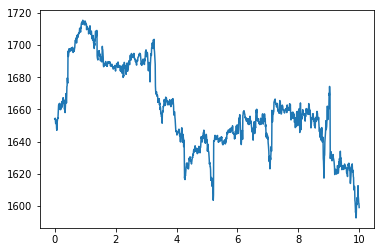

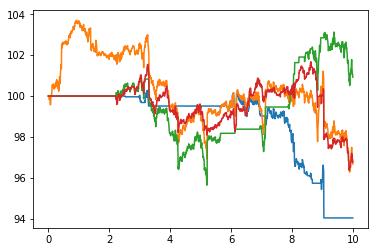

In [20]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot

import statsmodels


df_amzn = pandas.read_excel('amzn.xlsx')

close_amzn = df_amzn['Close']


T = 10
mu = 0.01
sigma = 0.02
S0 = 20
dt = 0.01
N = len(close_amzn)
t = np.linspace(0, T, N)


S = close_amzn
plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash

    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash

#TRADING: AR 
    
time_window = 3*int(1/dt)
cumsum = [0]

ar_prediction = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ar_prediction[i] = x
    if i>=time_window:
        X = S[0:i]
        train = X
        # train autoregression
        model = AR(train)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train), dynamic=False)
        ar_prediction[i] = predictions[len(train)]
    
    if ar_prediction[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ar_prediction[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ar_prediction[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

ar_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
plt.plot(t, mr_strategy)
plt.plot(t, ar_strategy)
plt.show()